In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#optional for prettier plots
sns.set(style="whitegrid")

#show plots inline (just in case)
%matplotlib inline

In [5]:
df = pd.read_csv("netflix_cleaned.csv")

df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_int,Duration_type,main_country
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International Tv Shows, Tv Dramas, Tv Sci-Fi &...",In a future where the elite inhabit an island ...,4,Season,Brazil
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min,United States


**Bar Plot – Count of TV Shows vs Movies**

📌 When to Use a Bar Plot:

To compare categories (like "TV Show" vs "Movie")

Helps answer: Which category is more frequent?

C:\Users\lucky\AppData\Local\Temp\ipykernel_22940\1659854461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


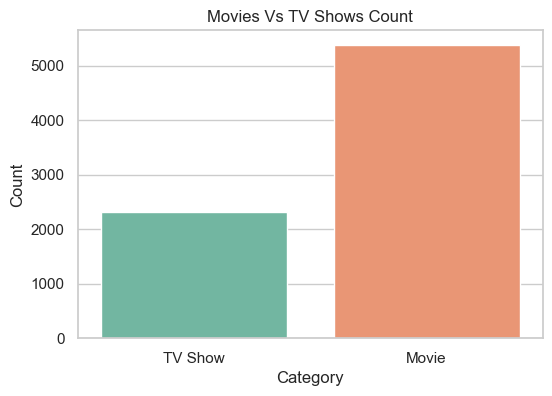

In [6]:
plt.figure(figsize=(6,4)) #Sets the width to 6 inches and height to 4 inches

sns.countplot(data=df, x='Category', palette='Set2')
#sns.countplot: Seaborn function that makes a bar plot for counting categories.
#data=df: We’re using the DataFrame named df (your Netflix dataset).
#x='Category': The x-axis will show different categories like "Movie" and "TV Show".
#palette='Set2': A built-in color theme in Seaborn that makes the bars look pretty.

plt.title("Movies Vs TV Shows Count")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Histogram - Durations of Movies**

A histogram is used to visualize the distribution of a numeric variable by grouping values into intervals (bins).

Example:
If we have the durations of movies (like 80 min, 120 min, 95 min), a histogram will show how many movies fall into each duration range (like 60–90 mins, 90–120 mins, etc.).

🧠 When Do We Use a Histogram?

To understand the shape of data (normal, skewed, etc.)

To see which ranges are more or less common

To detect outliers or unusual data


*Since TV Shows have "Season" in the Duration_type column, we can filter only the rows where Duration_type == 'min', which means they're movies.*

Let’s do that first:

In [7]:
# Filter only movies (with duration in minutes)
movie_data = df[df['Duration_type'] == 'min']

Now we’ll plot the histogram only for movie durations:

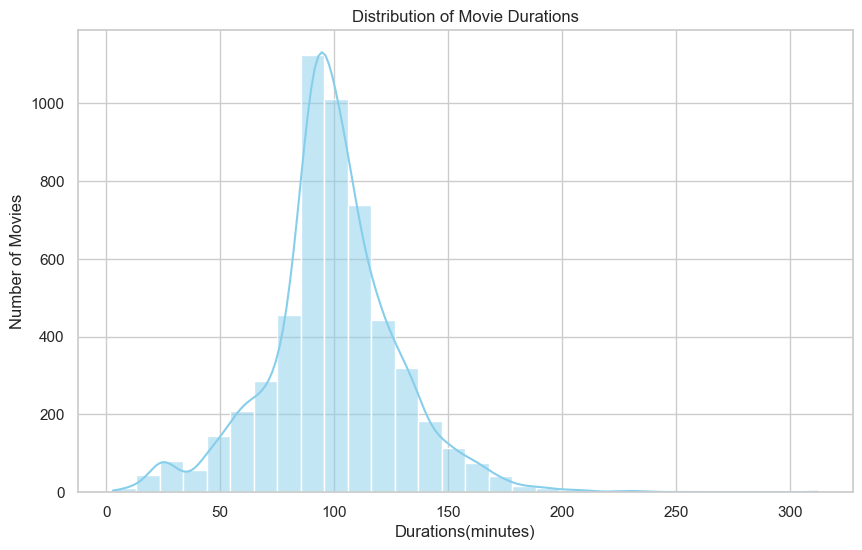

In [8]:
plt.figure(figsize=(10,6)) #Makes the plot larger and clearer.

sns.histplot(data=movie_data, x='Duration_int', bins=30, kde=True, color='skyblue')
#sns.histplot(...) → Draws the histogram.
#data=movie_data → Use movie data which contains dataframe about only movie data and not TV series.
#x='Duration_int' → Column with movie durations.
#bins=30 → Split durations into 30 groups.
#kde=True → Adds a smooth curve (optional).
#color='skyblue' → Just for pretty looks!

plt.title("Distribution of Movie Durations")
plt.xlabel("Durations(minutes)")
plt.ylabel("Number of Movies")
plt.show()

**🔍 Interpreting the Movie Duration Histogram**
    
🏔️ 1. Shape:
The graph is skewed to the right (a long tail on the right side).

This is called right-skewed distribution, meaning:

Most values are on the lower side, but a few extreme long movies stretch the range.

⏱️ 2. Peak (Mode):
The highest bar is around 90 to 100 minutes.

That means:

Most movies are between 90 and 100 minutes long (typical feature film length).

🐢 3. Outliers (Long Movies):
There are a few movies that are longer than 150 or even 200+ minutes.

These are unusual — maybe director's cuts, multi-part specials, etc.

🏁 4. Start Point:
Some bars start at very low durations (under 30 minutes).

These might be short films or incorrectly labeled entries.

💬 Final Summary (Visual Storytelling):
🎥 "Most Netflix movies are around 90 to 100 minutes long, with very few extremely long or short ones. The majority fall in the typical movie range, but a small number go beyond 2 hours."

-------

**Pie Chart - Content by Country (Top 5)**

A pie chart shows how a whole is divided into parts.
Each slice of the pie represents a proportion of the total.

🎯 When Do We Use a Pie Chart?
To compare proportions visually

To highlight dominance (e.g., "Which country has the most Netflix content?")

Works best for 5 or fewer categories
(Too many slices = confusing)

👩‍💻 Let’s Make a Pie Chart — Step by Step
We’ll show the Top 5 countries that produce the most Netflix content.

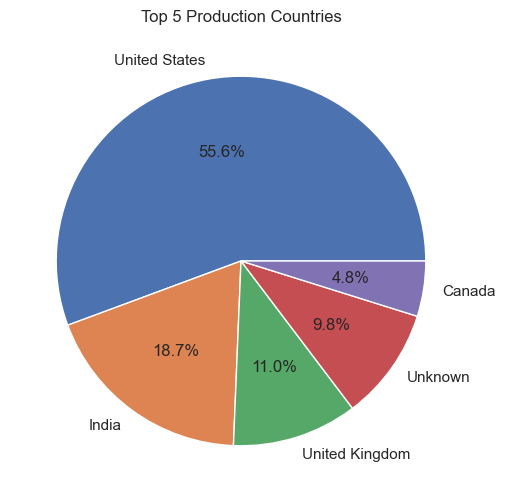

In [9]:
top_countries = df["main_country"].value_counts().nlargest(5)
#df['main_country'].value_counts() → Counts how many shows/movies each country has
#.nlargest(5) → Keeps only top 5 countries

top_countries.plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Top 5 Production Countries")
#.plot.pie() → Draws the pie chart
#autopct='%1.1f%%' → shows percentage on slices like 12.5%
#figsize=(6, 6) → makes pie big and clear and of a good size
#title='Top 5 Production Countries' → title for the chart

plt.ylabel("") # hides the y-axis label (not needed for pie chart)
plt.show()

How to exclude “Unknown” if you want to focus on real countries only

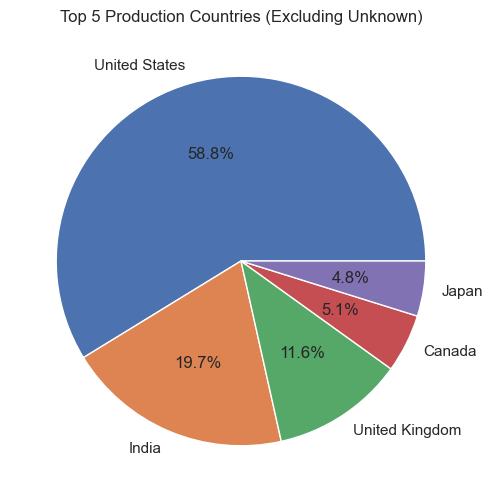

In [10]:
top_countries = df['main_country'].value_counts()
top_countries = top_countries.drop('Unknown')  # remove unknown
top_countries.nlargest(5).plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Top 5 Production Countries (Excluding Unknown)'
)
plt.ylabel("")
plt.show()


📖 What This New Pie Chart Tells Us:

🔍 Title: Top 5 Production Countries (Excluding Unknown)

✅ Visual Insights:
United States is still dominating — now even more — with 58.8%
➤ Once we removed “Unknown”, its actual proportion becomes clearer.

India follows with 19.7% — strong presence, growing industry.

United Kingdom is at 11.6%, consistent and reliable contributor.

Canada with 5.1% — holding steady, especially in TV content.

Japan enters the chart with 4.8% — likely due to Anime and global demand for Japanese media.


---

**Box Plot (aka Whisker Plot)**
            
🎯 What is a Box Plot?

A box plot shows how numeric data is spread and helps you spot:

Median (middle value)

Quartiles (25%, 75%)

Outliers (extreme values)

Overall distribution

📦 Example:'

Let’s say we have movie durations. A box plot will tell us:

What's the typical (median) duration

Whether there are outliers (very short/very long movies)

How "spread out" the durations are

🧠 When Do We Use a Box Plot?

To detect outliers

To compare distributions across groups
(e.g., Movie vs TV Show durations)

To understand data skewness or concentration


C:\Users\lucky\AppData\Local\Temp\ipykernel_22940\3103861740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Duration_int", palette="Pastel1")


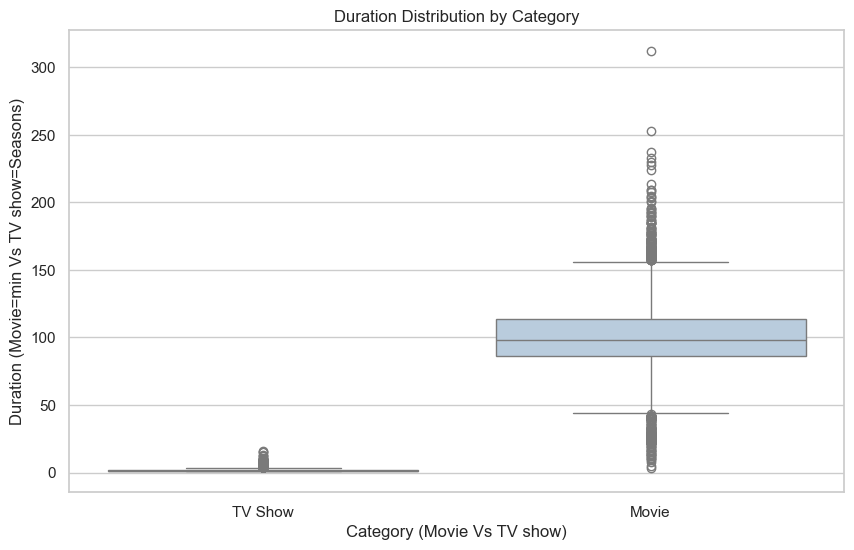

In [11]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x="Category", y="Duration_int", palette="Pastel1")

plt.title("Duration Distribution by Category")
plt.xlabel("Category (Movie Vs TV show)")
plt.ylabel("Duration (Movie=min Vs TV show=Seasons)")
plt.show()

🔍 What the Box Plot Shows (and Why It Looks Like This):

You’re comparing:

Movies → Duration_int in minutes (e.g., 90, 120)

TV Shows → Duration_int in seasons (e.g., 1, 2, 4)

So when both are plotted together:

Category = Movies, TV Shows

Unit = Minutes, Seasons

TYpical Values = 90,100,120 ; 1,2,3

Because the scale is totally different, the box for TV Shows looks tiny, and the plot is visually misleading if we don’t clarify that.

This plot teaches you that:

You should not mix units when visualizing.

Box plots assume same scale for fair comparison.

Always know your data types and units.


---

If you want to clearly understand the distribution of movie durations only, filter the data like this:

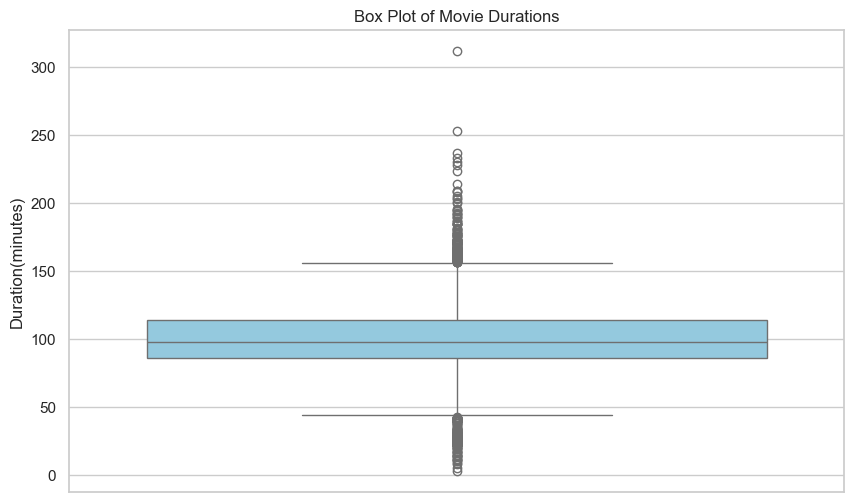

In [20]:
## Only keep Movies
movie_data= df[df["Category"] == "Movie"]

plt.figure(figsize=(10,6))
sns.boxplot(data=movie_data, y="Duration_int", color="skyblue")
plt.title("Box Plot of Movie Durations")
plt.ylabel("Duration(minutes)")
plt.show()

📦 Insights from the Box Plot:

Typical Duration Range (Interquartile Range – IQR):

The central box spans approximately from ~85 to ~115 minutes, indicating that 50% of all movies fall within this duration range.

This range reflects the industry norm for most feature-length films, aligning with standard viewer attention spans.

Median (Q2):

The median line, situated slightly below the center of the box, suggests that the typical movie lasts around 100 minutes.

This is a strong indicator for setting default runtime expectations for future content production or recommendations.

Whiskers:

The lower whisker extends to around 40–45 minutes, which may represent short films or borderline-length features.

The upper whisker extends to about 160 minutes, covering longer theatrical or director’s cut versions.

Outliers:

A significant number of outliers appear both below and above the whiskers:

On the short end (<40 mins): Likely animated specials, documentaries, or experimental short films.

On the long end (>160 mins, some even near 300 mins): These could be international epics, multi-part movies, or documentary series merged as films.

This suggests high variability in movie durations, indicating a need for segment-specific analysis.

The movie duration data shows a concentrated core around 100 minutes, with a diverse tail of unusually short and long films. This is a balanced catalog that serves mainstream expectations while still offering unique viewing options.

---

If you want to clearly understand the distribution of TV shows only, like we did for movie durations, filter the data like this:

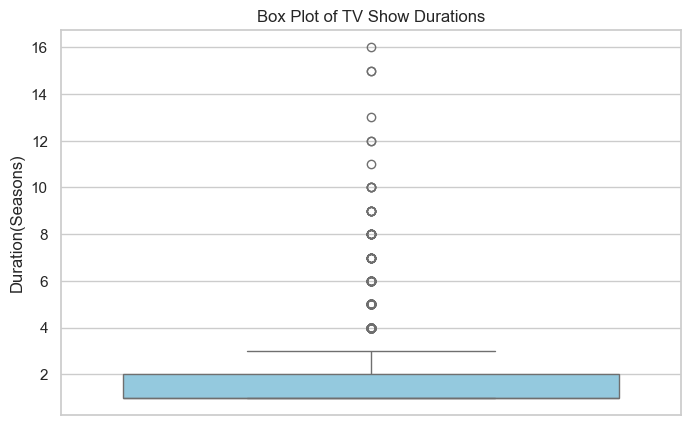

In [26]:
#Only keep TV Shows 
tv_data = df[df["Category"] == "TV Show"]

plt.figure(figsize=(8,5))
sns.boxplot(data=tv_data, y="Duration_int", color="skyblue")
plt.title("Box Plot of TV Show Durations")
plt.ylabel("Duration(Seasons)")
plt.show()

📦 Insights from the Box Plot:

Typical Range (Interquartile Range – IQR):

The box spans from 1 to 2 seasons, meaning 50% of TV shows on the platform have either one or two seasons.

This shows a dominant trend of short-format series — either limited series or recently released shows.

Median (Q2):

The median is at 1 season, suggesting that the majority of shows end in the first season, or they are newly released.

This could also reflect a platform strategy favoring short series, mini-series, or pilot productions.

Whiskers:

The upper whisker extends to 3 seasons, capturing most traditionally renewed shows.

The lower whisker is at 1, which is also the minimum — again pointing to a large volume of single-season content.

Outliers:

A notable number of outliers appear between 4 and 16 seasons.

These represent long-running shows, possibly:

Iconic legacy content.

Popular dramas or comedies with sustained success.

International syndicated content with large episode volumes.

The longest one appears to be 16 seasons, likely representing a flagship series or sitcom.

The platform’s TV catalog is dominated by short-format content (1–2 seasons), with a few outlier series stretching up to 16 seasons. This distribution suggests a "binge & rotate" strategy: engage users with quick series and retain them with legacy or hit shows.


---

**📈 Line Plot — Step-by-Step Guide**

What is a Line Plot?

A line plot is used to show trends over time.

Each point shows a value for a specific time period (like each year), and the line connects these points to show how the value changes.

🎯 Example:
    
If Netflix released 300 shows in 2015, 400 in 2016, and 500 in 2017 —

a line plot will draw a point at each of these years and connect them to show the growth over time.

🧠 When Do We Use Line Plots?
    
✅ To track changes over time (monthly, yearly...)

✅ To observe trends (rise, fall, patterns)

✅ To compare changes for multiple categories

🛠️ Let’s Make a Line Plot (Step-by-Step)
    
We’ll use the Release_Date column from your dataset to see how many shows/movies were released each year.

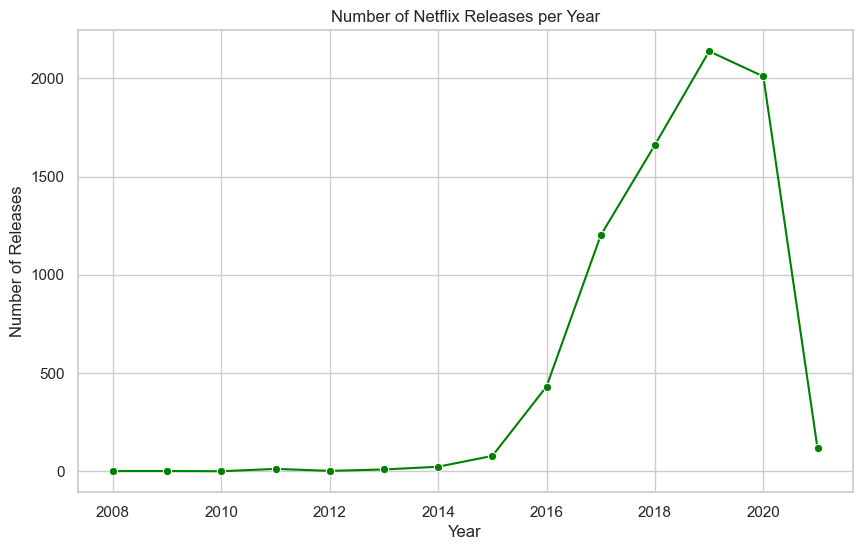

In [28]:
#Convert the Release_Date column to datetime format
df["Release_Date"] = pd.to_datetime(df["Release_Date"]) #If it’s already in datetime format, this won’t hurt. If it’s not — this will fix it!

#Extract the Year from Release_Date
df["Year"] = df["Release_Date"].dt.year #.dt.year takes only the year part (like 2019 from 2019-04-16)

#Count number of releases per year
yearly_counts = df["Year"].value_counts().sort_index()
#value_counts() counts how many entries per year
#sort_index() arranges the years in order (2010, 2011, 2012…)

#Plot the Line Plot!
plt.figure(figsize=(10,6)) ## Makes the plot big and clear

sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="green")
#sns.lineplot(...) → Draws the line plot
#marker='o' → Adds a dot on each year point
#x=yearly_counts.index → The years
#y=yearly_counts.values → Count of shows/movies

plt.title("Number of Netflix Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True) # Adds a grid for better readability
#plt.grid(True) → Helps see the line better

plt.show()

📊 What This Graph Tells Us (Analysis):

Low Releases Before 2015

From 2007 to around 2014, the number of releases was very low.

Netflix had just started getting into original content, and growth was slow.

Big Rise After 2015

From 2015 onwards, the curve rises steeply!

This shows Netflix started producing and releasing more content rapidly — they were scaling up.

Likely due to global expansion and investment in original content.

Peak in 2019

2019 shows the highest number of releases — over 2,100!

Netflix was at its peak growth and releasing a large amount of content.

Dip After 2020

After 2020, there’s a sharp drop.

This could be because of the COVID-19 pandemic, which halted many productions globally.

**Heatmap of Missing Data**

📌 Why Use This?

See where data is missing visually

Helps during data cleaning

Each row = a record; Each column = a feature

Yellow/light = missing; Dark = present

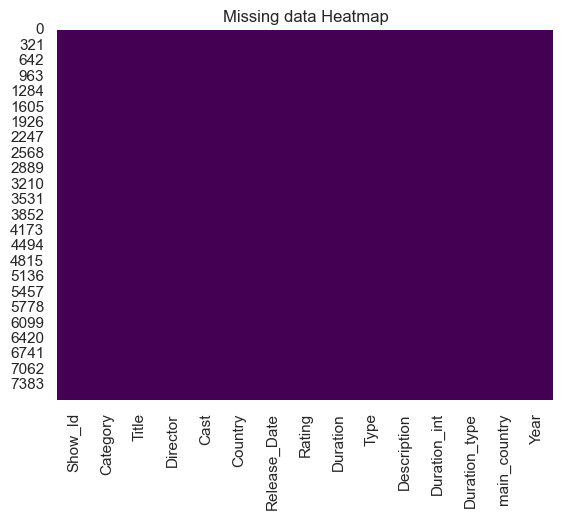

In [32]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
#cbar=False
#Means: Don’t show the color bar (the legend on the side).
#Why?: This is optional. Since it's a True/False map, we don’t need a scale legend here.

#cmap='viridis'
#cmap = Color Map → tells Seaborn what colors to use.
#'viridis' is a built-in gradient going from dark to light.
#Light color → True (missing)
#Dark color → False (not missing)

plt.title("Missing data Heatmap")
plt.show()

#You're telling Python: Hey! Show me a visual of all missing values in this DataFrame. Make it a color grid, highlight missing parts, and skip the color bar because I only need to see if something’s missing — not how much.

🧠 What the Heatmap Shows:

Each row = one record (e.g., one Netflix show).

Each column = one feature (like Title, Director, Rating, etc.).

Dark purple color = No missing value (🟣 means False in isnull()).

Light/bright yellow (if any) = Missing value (True in isnull()).

📊 What Heatmap Tells:
From your image:

The chart is almost fully dark purple 🔮 → that’s actually great news!

It means:

✅ Most of your data is clean.

❌ There are very few (if any) missing values.

In [33]:
df.isnull().sum().sort_values(ascending=False)


Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date     0
Rating           0
Duration         0
Type             0
Description      0
Duration_int     0
Duration_type    0
main_country     0
Year             0
dtype: int64

as we can see data is clean and there are no missing values

**Scatter plot**

What is a Scatter Plot?

A scatter plot is used to show the relationship between two numeric variables.

🎯 When to Use a Scatter Plot?

To see patterns, trends, or clusters between two variables.

To detect outliers.

To check if two variables are positively or negatively related.

📌 Example:

Let’s say we want to check:

Does the year of release affect the duration of a Netflix show?

That means we’ll plot:

X-axis = Year (when the show was released)

Y-axis = Duration_int (duration in minutes or seasons)

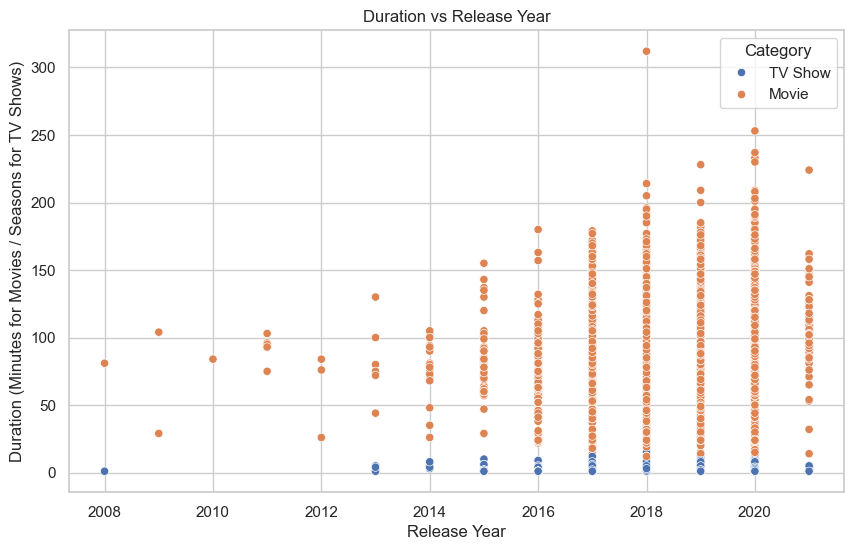

In [36]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.scatterplot(data=df, x='Year', y='Duration_int', hue='Category')

plt.title("Duration vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes for Movies / Seasons for TV Shows)")
plt.show()

#plt.figure(figsize=(10, 6))	Makes the plot bigger so it’s easy to read.
#sns.scatterplot(...)	Creates the actual scatter plot using Seaborn.
#data=df	Use our Netflix DataFrame.
#x='Year'	X-axis = Year of release.
#y='Duration_int'	Y-axis = Duration of the show and movies.
#hue='Category'	Color the points differently for Movies and TV Shows.
#plt.title(...)	Adds the plot title.
#plt.xlabel(...), plt.ylabel(...)	Labels the axes.
#plt.show()	Displays the plot.

🔍 What This Graph Tells Us (Insights)

✅ Trend 1: More Releases in Recent Years

From around 2015 onwards, the number of points increases → that means Netflix started releasing more content after 2015.

✅ Trend 2: Most Movies Are Around 90-120 Minutes

Look at the orange dots — most are between 60 to 120 on the y-axis → typical movie durations.

✅ Trend 3: TV Shows Usually Have 1-3 Seasons

Blue dots mostly stay low on the y-axis → so most shows are short series or single-season.

✅ Trend 4: Outliers Exist

Some orange dots go very high (above 200 mins!) → these are very long movies or maybe errors (can be explored later).

✅ Summary:

“The scatter plot shows that Netflix began releasing significantly more content after 2015. Most movies range between 60–120 minutes, while TV shows tend to have 1–3 seasons. A few outliers exist with unusually long durations.”